# Traditional Models

### Install All Required Libraries

In [ ]:
!pip uninstall -y numpy scipy pandas statsmodels

In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 statsmodels==0.13.5

In [ ]:
!pip install pmdarima

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Function to check stationarity using ADF Test
def test_stationarity(timeseries, label='Time Series'):
    result = adfuller(timeseries.dropna())
    print(f"ADF Test for {label}: p-value = {result[1]:.5f}")
    if result[1] < 0.05:
        print(f"{label} is Stationary.\n")
    else:
        print(f" {label} is NOT Stationary.\n")
    return result[1] < 0.05

In [5]:
#  Function to apply ARMA model on differenced data
def fit_arma_model(ts, label='Dataset'):
    ts_diff = ts.diff().dropna()

    # Plot ACF and PACF to identify orders
    plot_acf(ts_diff)
    plt.title(f"ACF Plot - {label}")
    plt.show()

    plot_pacf(ts_diff)
    plt.title(f"PACF Plot - {label}")
    plt.show()

    # Fit ARMA(p=2, q=2) model manually
    arma_model = ARIMA(ts_diff, order=(2, 0, 2)).fit()
    print(f" ARMA(2,0,2) Summary for {label}:\n", arma_model.summary())

    # Forecast differenced values and revert to original scale
    future_diff = arma_model.forecast(steps=24)
    forecast_vals = ts.iloc[-1] + np.cumsum(future_diff)
    future_idx = pd.date_range(start=ts.index[-1], periods=25, freq='M')[1:]

    plt.figure(figsize=(10, 5))
    plt.plot(ts, label='Original')
    plt.plot(future_idx, forecast_vals, label='ARMA Forecast', color='green')
    plt.title(f"{label} - ARMA Forecast (24 Months)")
    plt.legend()
    plt.show()

In [6]:
# Function to apply Auto ARIMA and forecast
def run_auto_arima(ts, label='Series'):
    arima_model = pm.auto_arima(ts, seasonal=False, trace=True,
                                stepwise=True, suppress_warnings=True)
    print(f"Auto ARIMA selected order for {label}: {arima_model.order}")

    # Fit final ARIMA model
    final_model = ARIMA(ts, order=arima_model.order).fit()
    prediction = final_model.forecast(steps=24)
    future_dates = pd.date_range(start=ts.index[-1], periods=25, freq='M')[1:]

    # Plot forecast
    plt.figure(figsize=(10, 5))
    plt.plot(ts, label='Historical')
    plt.plot(future_dates, prediction, label='Auto ARIMA Forecast', color='red')
    plt.title(f"{label} - Auto ARIMA Forecast (24 Months)")
    plt.legend()
    plt.show()

In [7]:
# Load and Process jj.csv
jj_data = pd.read_csv("jj.csv")
jj_data.columns = ['Quarter', 'Sales']
jj_data['Quarter'] = pd.to_datetime(jj_data['Quarter'])
jj_data.set_index('Quarter', inplace=True)
jj_monthly = jj_data['Sales'].resample('M').ffill()

In [8]:
# Load and Process AMZN.csv
amzn_data = pd.read_csv("AMZN.csv")
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_data.set_index('Date', inplace=True)
amzn_monthly = amzn_data['Close'].resample('M').mean()

# Apply to JJ Dataset

In [10]:
test_stationarity(jj_monthly.diff(), 'JJ Monthly Differenced')

ADF Test for JJ Monthly Differenced: p-value = 0.43479
 JJ Monthly Differenced is NOT Stationary.



False

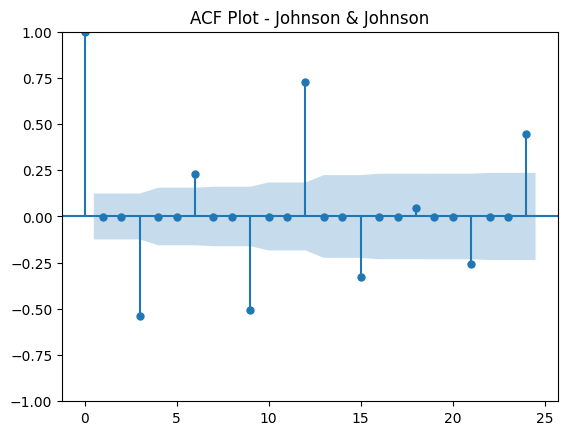

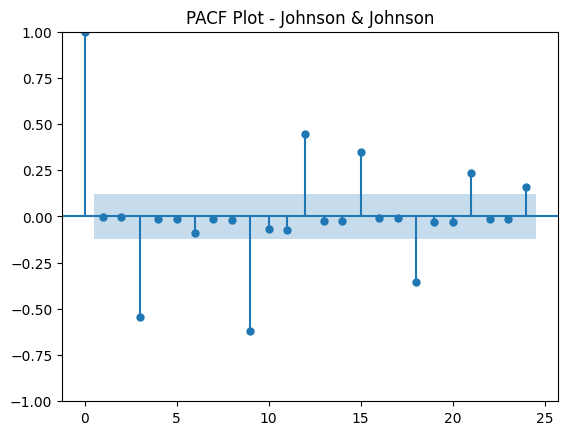

 ARMA(2,0,2) Summary for Johnson & Johnson:
                                SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  249
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -279.636
Date:                Thu, 10 Apr 2025   AIC                            571.271
Time:                        15:38:26   BIC                            592.376
Sample:                    02-29-1960   HQIC                           579.766
                         - 10-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0608      0.023      2.611      0.009       0.015       0.106
ar.L1         -0.2214      0.128     -1.728      0.084      -0.472       0.030
ar.L2  

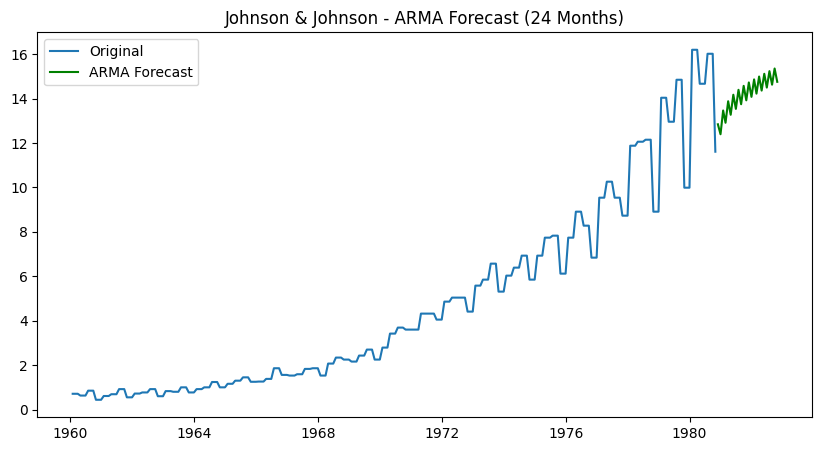

In [11]:
fit_arma_model(jj_monthly, label="Johnson & Johnson")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=564.828, Time=2.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=611.723, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=613.719, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=613.719, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=610.432, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=582.119, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=573.537, Time=1.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=509.862, Time=4.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=522.633, Time=1.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=513.626, Time=2.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=499.328, Time=1.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=476.765, Time=2.99 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=472.474, Time=5.38 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=503.031, 

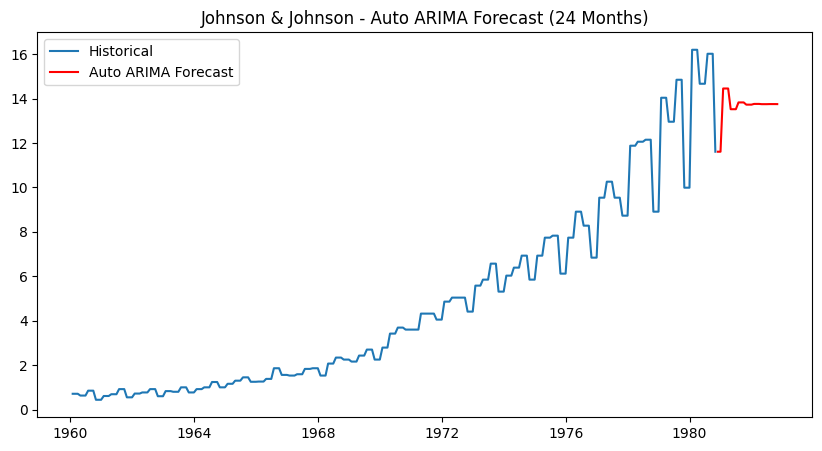

In [12]:
run_auto_arima(jj_monthly, label="Johnson & Johnson")

# Apply to AMZN Dataset

In [13]:
test_stationarity(amzn_monthly.diff(), 'Amazon Monthly Differenced')

ADF Test for Amazon Monthly Differenced: p-value = 0.00000
Amazon Monthly Differenced is Stationary.



True

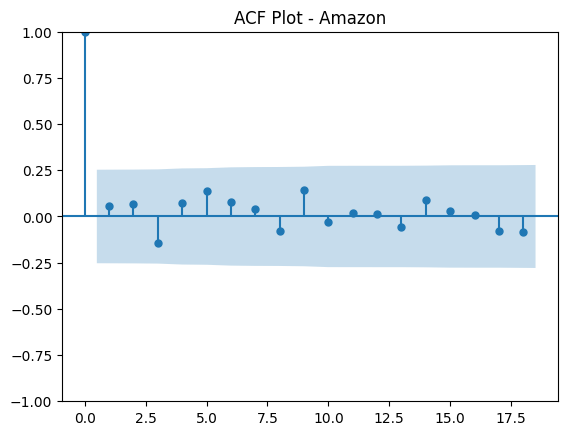

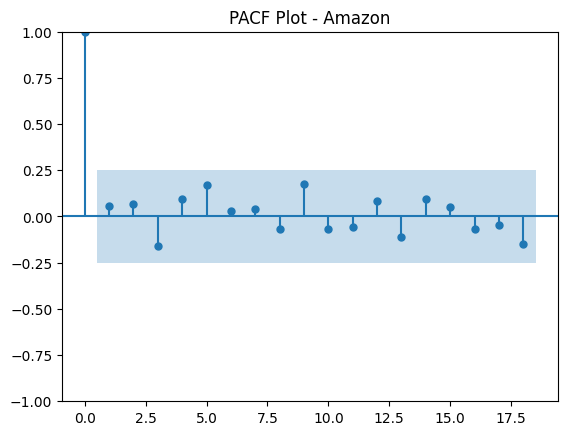

 ARMA(2,0,2) Summary for Amazon:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   60
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -219.701
Date:                Thu, 10 Apr 2025   AIC                            451.401
Time:                        15:39:07   BIC                            463.967
Sample:                    03-31-2018   HQIC                           456.317
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4516      1.568      0.288      0.773      -2.621       3.525
ar.L1         -1.4367      0.162     -8.890      0.000      -1.753      -1.120
ar.L2         -0.7

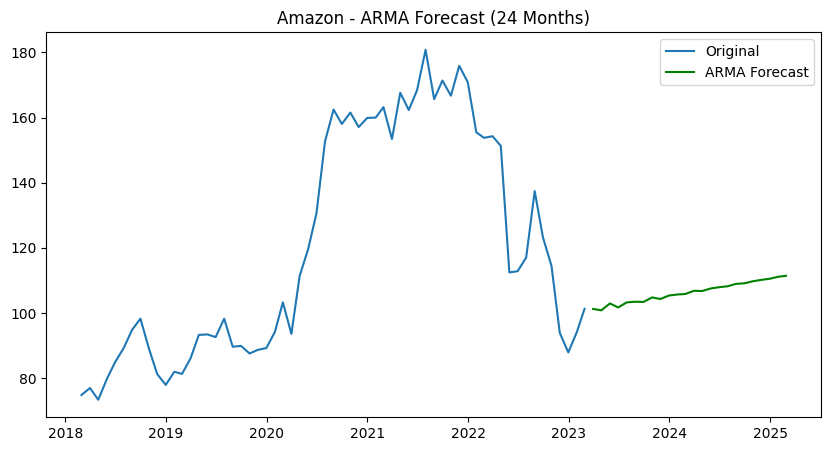

In [14]:
fit_arma_model(amzn_monthly, label="Amazon")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=448.342, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=450.159, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=450.182, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=446.463, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=452.279, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.586 seconds
Auto ARIMA selected order for Amazon: (0, 1, 0)


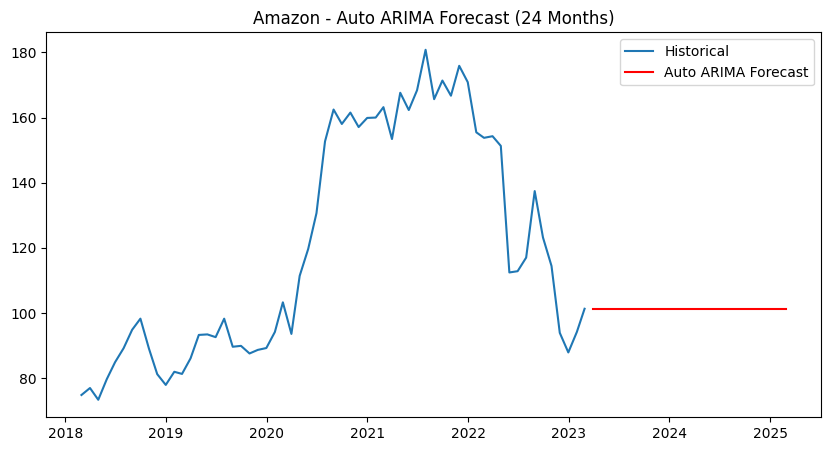

In [15]:
run_auto_arima(amzn_monthly, label="Amazon")

# Neural Network Models

In [ ]:
!pip install --upgrade numpy scipy pandas statsmodels

In [10]:
# Imports for Deep Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.random import set_seed
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Reproducibility
np.random.seed(42)
set_seed(42)

In [12]:
# Preprocessing Function
def prepare_series(data, look_back=12):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

In [17]:
# Model Training & Forecasting
def build_and_forecast_nn(data, model_type='LSTM', label='Series', look_back=12):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = prepare_series(scaled_data, look_back)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Define the model
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(64, activation='relu', input_shape=(look_back, 1)))
    elif model_type == 'GRU':
        model.add(GRU(64, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train model
    model.fit(X, y, epochs=50, verbose=0)

    # Forecasting the next 24 months
    future_input = scaled_data[-look_back:].reshape(1, look_back, 1)
    future_preds = []
    for _ in range(24):
        pred = model.predict(future_input)[0][0]
        future_preds.append(pred)
        future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

    # Rescale predictions
    forecast_vals = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1)).flatten()

    # Plot forecast
    forecast_index = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:]
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data.values, label='Historical Data')
    plt.plot(forecast_index, forecast_vals, label=f'{model_type} Forecast', color='purple' if model_type == 'LSTM' else 'orange')
    plt.title(f'{label} - {model_type} Forecast (24 Months)')
    plt.legend()
    plt.show()

    # Evaluation on train set
    y_pred_train = model.predict(X)
    y_true_train = y
    print(f" Evaluation Metrics for {label} using {model_type}:")
    print(f"- MSE: {mean_squared_error(y_true_train, y_pred_train):.5f}")
    print(f"- MAE: {mean_absolute_error(y_true_train, y_pred_train):.5f}\n")

## Run All Function

In [18]:
# Load and Prepare jj.csv
jj_df = pd.read_csv("jj.csv")
jj_df.columns = ['Quarter', 'Sales']
jj_df['Quarter'] = pd.to_datetime(jj_df['Quarter'])
jj_df.set_index('Quarter', inplace=True)
jj_monthly = jj_df['Sales'].resample('M').ffill()

In [19]:
# Load and Prepare AMZN.csv
amzn_df = pd.read_csv("AMZN.csv")
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df.set_index('Date', inplace=True)
amzn_monthly = amzn_df['Close'].resample('M').mean()

## Run LSTM and GRU for JJ Data

 Johnson & Johnson Sales - LSTM Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


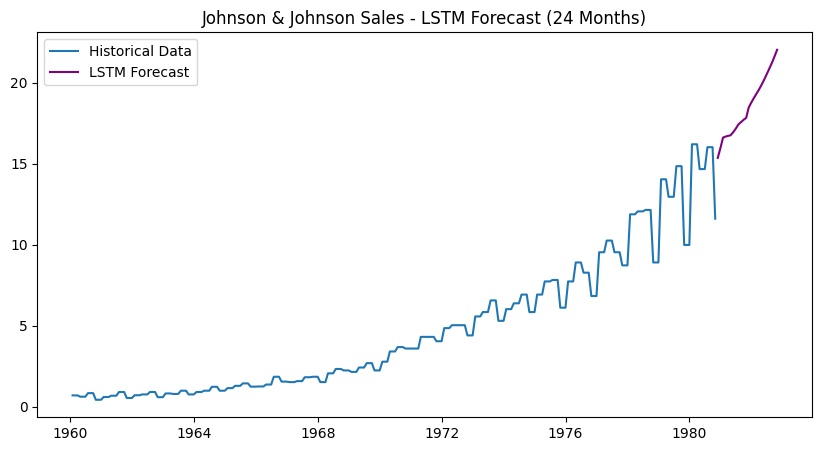

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
 Evaluation Metrics for Johnson & Johnson Sales using LSTM:
   - MSE: 0.00272
   - MAE: 0.02974



In [20]:
print(" Johnson & Johnson Sales - LSTM Model")
build_and_forecast_nn(jj_monthly, model_type='LSTM', label='Johnson & Johnson Sales')

 Johnson & Johnson Sales - GRU Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


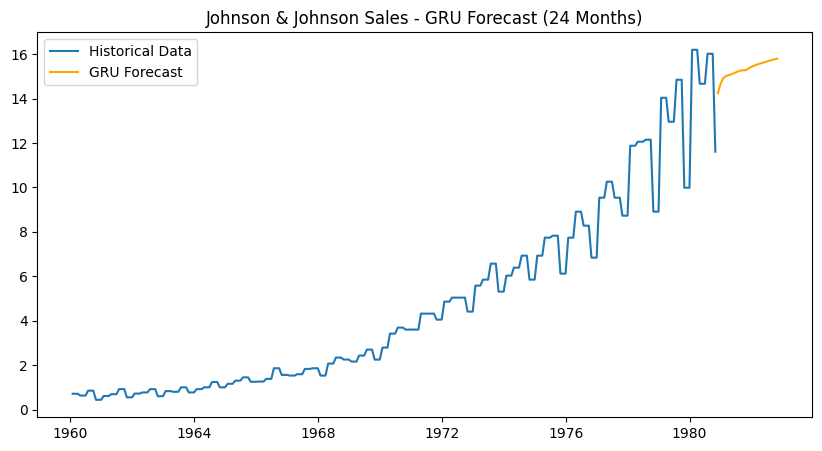

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
 Evaluation Metrics for Johnson & Johnson Sales using GRU:
   - MSE: 0.00281
   - MAE: 0.02855



In [21]:
print(" Johnson & Johnson Sales - GRU Model")
build_and_forecast_nn(jj_monthly, model_type='GRU', label='Johnson & Johnson Sales')

## Run LSTM and GRU for AMZN Data

 Amazon Stock Price - LSTM Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


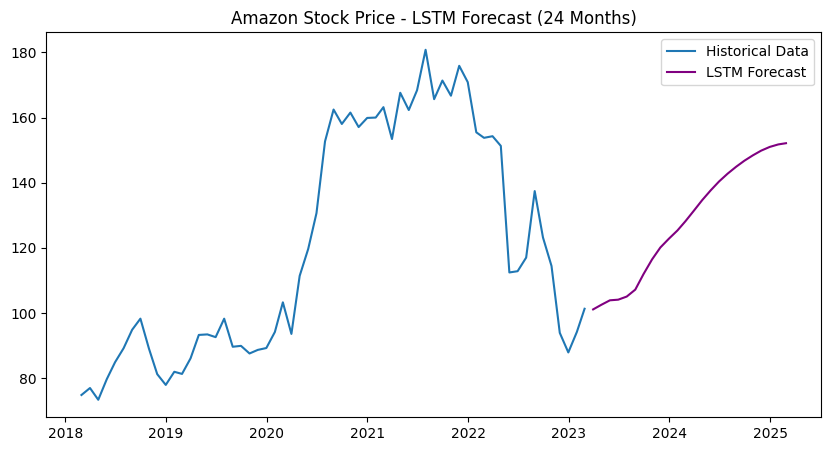

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
 Evaluation Metrics for Amazon Stock Price using LSTM:
   - MSE: 0.01528
   - MAE: 0.10186



In [22]:
print(" Amazon Stock Price - LSTM Model")
build_and_forecast_nn(amzn_monthly, model_type='LSTM', label='Amazon Stock Price')

 Amazon Stock Price - GRU Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


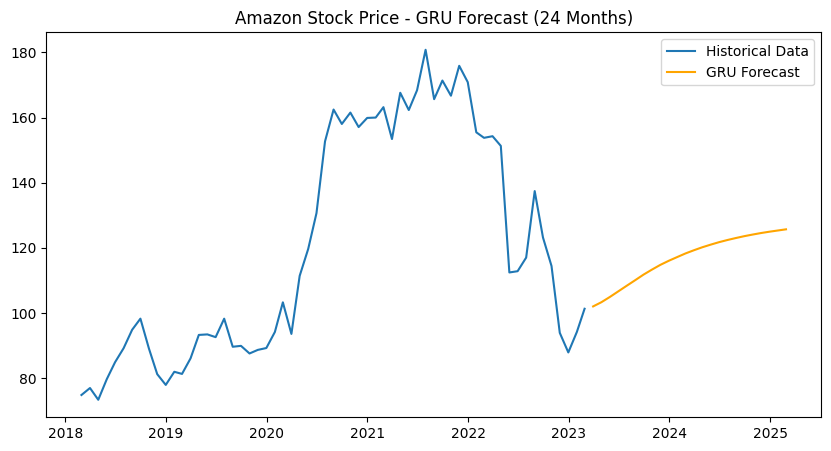

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 
 Evaluation Metrics for Amazon Stock Price using GRU:
   - MSE: 0.01510
   - MAE: 0.09177



In [23]:
print(" Amazon Stock Price - GRU Model")
build_and_forecast_nn(amzn_monthly, model_type='GRU', label='Amazon Stock Price')